In [127]:
'''TODO 
look at both y variables total and per quarter 
both better_than_spy 
and return (or future price) #add a better_return_than_spy?

'''

'TODO \nlook at both y variables total and per quarter \nboth better_than_spy \nand return (or future price) #add a better_return_than_spy?\n\n'

In [128]:

import pandas as pd 
pd.options.mode.chained_assignment = None
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
import seaborn as sns

import matplotlib.pyplot as plt
from scipy import stats
pd.options.display.float_format = '{:20,.2f}'.format
import sys 
from sklearn import svm

In [129]:

#df = pd.read_excel('/home/milo/Documents/Project4/data/machineLearningData.xlsx')
df = pd.read_excel('ml_data.xlsx')
df = df.set_index('ticker')
df.shape

(2480, 107)

In [130]:
#note the sequences are simply shorthand for the 5 quarters we are looking at (we can't test the last one unless we 
# get another quarter's data after that... )
sequences = [0,1,2,3,4]

In [131]:
df.head()

,gics_sector,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,accumulatedDepreciationAmortizationPPE,...,days_in_inventory_ratio,gross_margin_ratio,operating_margin_ratio,roa_ratio,roe_ratio,sequence,rolling62_adjustedclose,next_rolling62_adjustedclose,return,better_than_spy
ticker,,,,,,,,,,,,,,,,,,,,,
MMM,Industrials,45634000000,14514000000,2722000000,"2,722,000,000.00","5,645,000,000.00","4,914,000,000.00","31,120,000,000.00",9319000000,"17,694,000,000.00",...,386.00,46.27,1.41,0.00,0.01,0,107.67,98.77,-0.08,0
MMM,Industrials,46176000000,14895000000,3404000000,"3,404,000,000.00","5,615,000,000.00","4,722,000,000.00","31,281,000,000.00",9196000000,"17,470,000,000.00",...,426.49,1.01,1.08,0.08,0.27,1,98.77,92.93,-0.06,0
MMM,Industrials,46455000000,14688000000,3655000000,"3,655,000,000.00","5,372,000,000.00","4,532,000,000.00","34,124,000,000.00",9178000000,"16,820,000,000.00",...,443.13,6.46,1.17,0.01,0.04,2,92.93,86.89,-0.07,0
MMM,Industrials,46886000000,14963000000,3824000000,"3,824,000,000.00","5,306,000,000.00","4,638,000,000.00","31,923,000,000.00",9247000000,"17,049,000,000.00",...,423.43,3.50,1.27,0.02,0.06,3,86.89,79.38,-0.09,0
MMM,Industrials,48880000000,15754000000,4258000000,"4,258,000,000.00","5,280,000,000.00","4,947,000,000.00","33,126,000,000.00",9211000000,"17,248,000,000.00",...,418.81,-0.54,1.37,-0.14,-0.88,4,79.38,81.46,0.03,0


In [132]:
#get the numerical variables
num_vars = df.select_dtypes(include=['float','int']).columns
dfnum=df[num_vars]
corr = dfnum.corr()
corr #we will need to consider correlated features 

,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,accumulatedDepreciationAmortizationPPE,intangibleAssets,...,days_in_inventory_ratio,gross_margin_ratio,operating_margin_ratio,roa_ratio,roe_ratio,sequence,rolling62_adjustedclose,next_rolling62_adjustedclose,return,better_than_spy
totalAssets,1.00,0.84,0.93,0.91,-0.76,0.13,0.30,0.15,0.11,0.28,...,-0.07,-0.01,-0.01,-0.13,0.00,0.00,-0.05,-0.05,-0.03,-0.02
totalCurrentAssets,0.84,1.00,0.82,0.91,-0.65,0.28,0.39,0.23,0.17,0.30,...,-0.07,-0.02,-0.01,-0.07,0.01,0.00,-0.02,-0.02,-0.00,0.00
cashAndCashEquivalentsAtCarryingValue,0.93,0.82,1.00,0.92,-0.87,0.04,0.18,0.07,0.03,0.16,...,-0.06,-0.01,-0.01,-0.08,0.00,0.01,-0.01,-0.01,-0.00,-0.00
cashAndShortTermInvestments,0.91,0.91,0.92,1.00,-0.78,0.12,0.25,0.12,0.06,0.23,...,-0.06,-0.01,-0.01,-0.07,0.00,0.01,-0.01,-0.01,-0.00,0.00
inventory,-0.76,-0.65,-0.87,-0.78,1.00,0.03,-0.08,0.01,0.03,-0.06,...,0.08,0.00,-0.00,0.08,0.00,-0.00,0.01,0.01,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sequence,0.00,0.00,0.01,0.01,-0.00,-0.00,0.01,0.01,0.01,0.01,...,0.01,0.03,0.04,-0.03,-0.02,1.00,0.02,0.03,0.19,-0.14
rolling62_adjustedclose,-0.05,-0.02,-0.01,-0.01,0.01,-0.03,-0.05,-0.08,-0.06,-0.03,...,0.00,-0.02,-0.00,0.24,0.02,0.02,1.00,1.00,0.04,0.05
next_rolling62_adjustedclose,-0.05,-0.02,-0.01,-0.01,0.01,-0.03,-0.06,-0.08,-0.06,-0.03,...,0.00,-0.02,-0.00,0.24,0.02,0.03,1.00,1.00,0.09,0.09
return,-0.03,-0.00,-0.00,-0.00,0.00,0.00,-0.05,-0.03,-0.03,-0.06,...,0.01,0.02,0.03,0.13,0.00,0.19,0.04,0.09,1.00,0.69


In [133]:
df.describe()

,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,accumulatedDepreciationAmortizationPPE,intangibleAssets,...,days_in_inventory_ratio,gross_margin_ratio,operating_margin_ratio,roa_ratio,roe_ratio,sequence,rolling62_adjustedclose,next_rolling62_adjustedclose,return,better_than_spy
count,"2,480.00","2,480.00","2,480.00","2,480.00","2,480.00","2,480.00","2,480.00","2,480.00","2,480.00","2,480.00",...,"2,480.00","2,480.00","2,480.00","2,480.00","2,480.00","2,480.00","2,480.00","2,480.00","2,480.00","2,480.00"
mean,"89,473,167,460.48","17,847,657,202.02","6,812,045,140.32","9,235,838,817.24","-9,967,041,525.50","3,203,949,249.21","27,351,805,926.98","11,319,419,354.13","8,400,159,933.37","12,169,016,821.33",...,-396.77,5.23,2.16,0.02,0.02,2.00,156.80,161.01,0.02,0.47
std,"286,068,426,152.08","47,215,112,355.66","35,039,140,829.30","40,971,044,626.28","115,689,587,131.09","6,824,570,865.94","42,201,339,413.79","24,152,875,001.99","22,426,569,000.02","22,719,443,301.13",...,"307,120.62",65.17,41.34,0.02,2.16,1.41,283.08,302.98,0.11,0.50
min,"764,708,000.00","921,000.00","921,000.00","921,000.00","-1,886,356,000,000.00","-768,000,000.00","288,000.00","-13,650,000,000.00","-1,240,100,000.00","-399,000,000.00",...,"-3,935,065.00","-1,251.20",-217.89,-0.27,-70.33,0.00,4.56,5.75,-0.51,0.00
25%,"12,174,614,500.00","2,545,800,000.00","400,738,250.00","437,917,500.00","107,617,500.00","368,493,000.00","5,231,225,000.00","727,250,000.00","572,750,000.00","991,500,000.00",...,38.87,1.45,1.06,0.01,0.02,1.00,54.53,54.74,-0.05,0.00
50%,"26,125,500,000.00","5,527,607,000.00","1,168,000,000.00","1,301,961,500.00","864,426,000.00","1,148,629,500.00","12,242,000,000.00","2,492,500,000.00","2,098,100,000.00","4,477,756,000.00",...,253.15,2.69,1.32,0.01,0.04,2.00,96.92,98.49,0.01,0.00
75%,"63,383,500,000.00","14,023,750,000.00","3,598,360,000.00","4,462,750,000.00","2,753,250,000.00","2,957,700,000.00","30,381,750,000.00","9,725,000,000.00","7,191,500,000.00","11,557,975,000.00",...,524.51,4.88,1.54,0.03,0.08,3.00,183.23,189.19,0.08,1.00
max,"3,868,240,000,000.00","673,969,000,000.00","641,860,000,000.00","669,260,000,000.00","173,717,000,000.00","64,778,000,000.00","358,017,000,000.00","209,159,000,000.00","273,255,500,000.00","221,943,000,000.00",...,"10,639,020.00","2,491.61","1,864.26",0.21,29.20,4.00,"5,820.19","6,209.09",0.86,1.00


In [134]:
nulls = df.isna().sum()
nulls.max() #no nulls after manipulation 

0

# HISTOGRAMS OF NORMALIZED NUMERICAL COLUMNS

105


/home/milo/miniconda3/envs/project4/lib/python3.11/site-packages/pandas/plotting/_matplotlib/tools.py:233: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


array([[<Axes: title={'center': 'costofGoodsAndServicesSold'}>]],
      dtype=object)

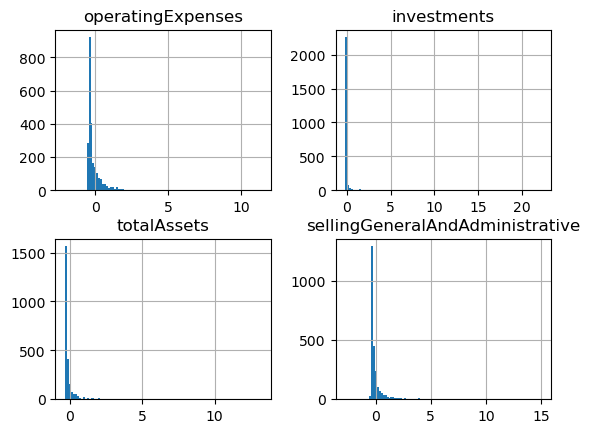

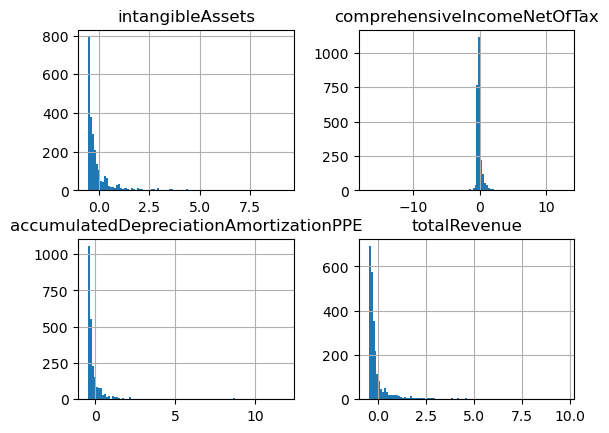

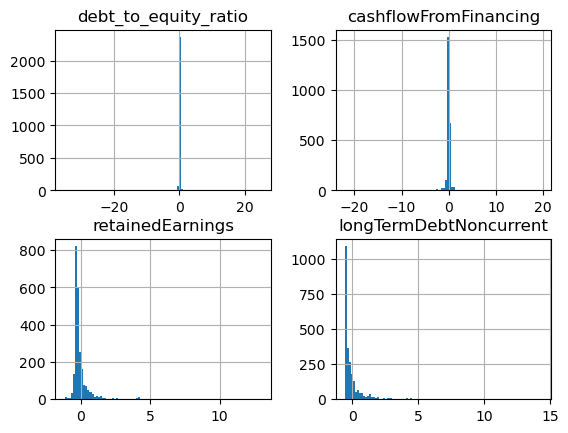

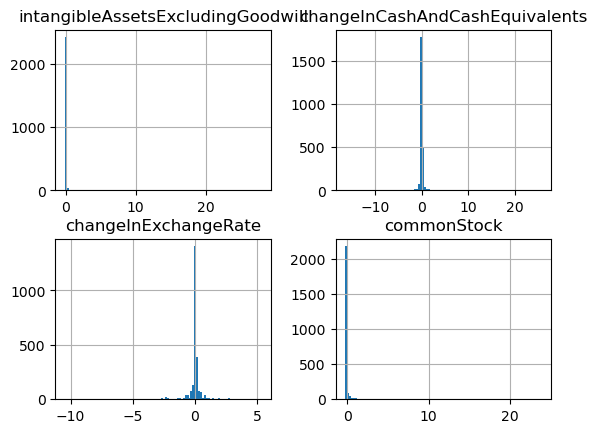

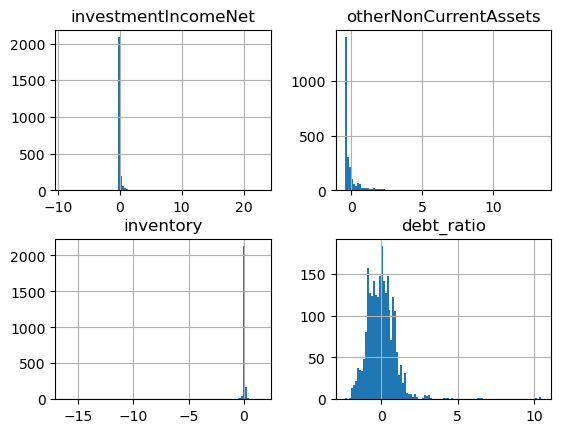

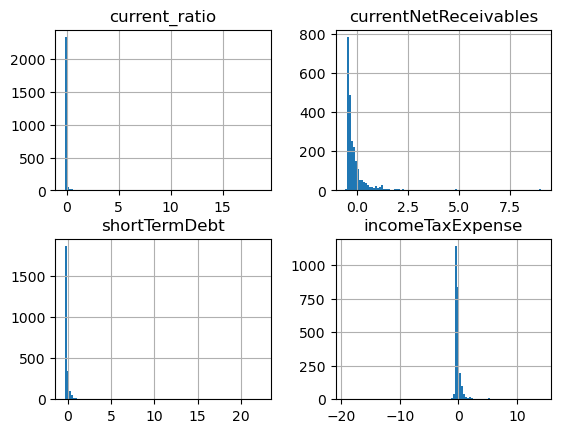

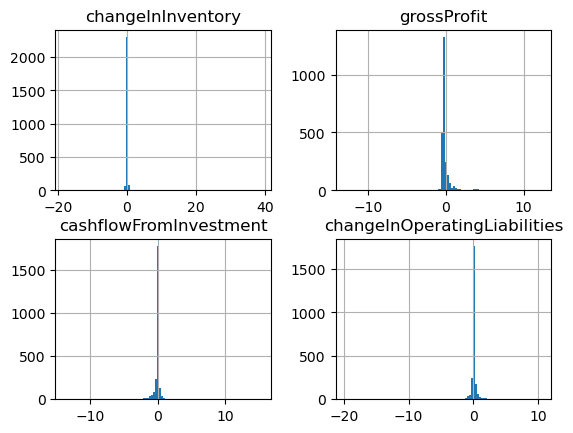

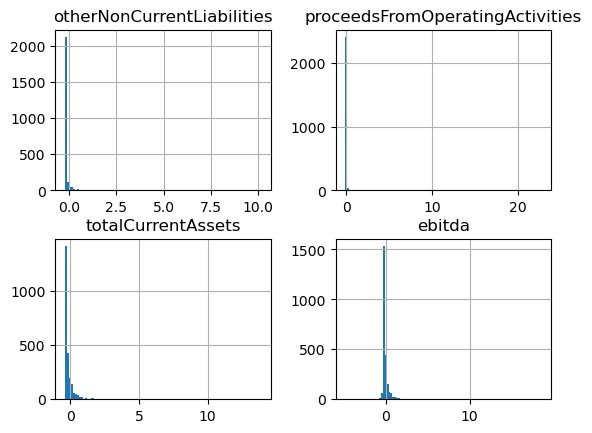

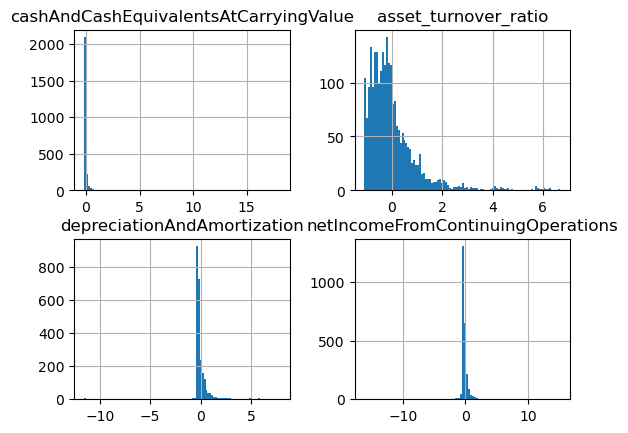

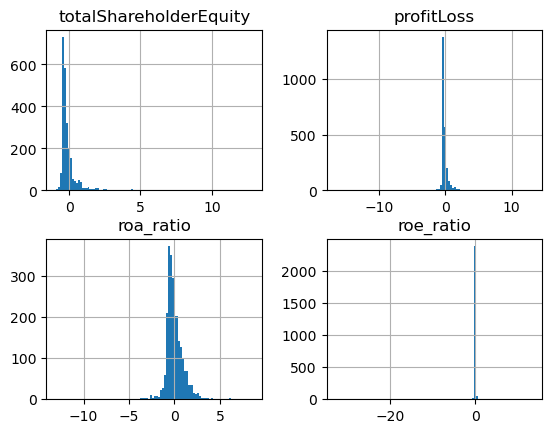

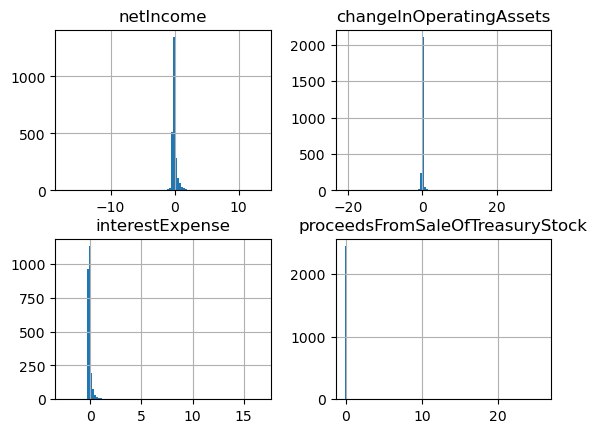

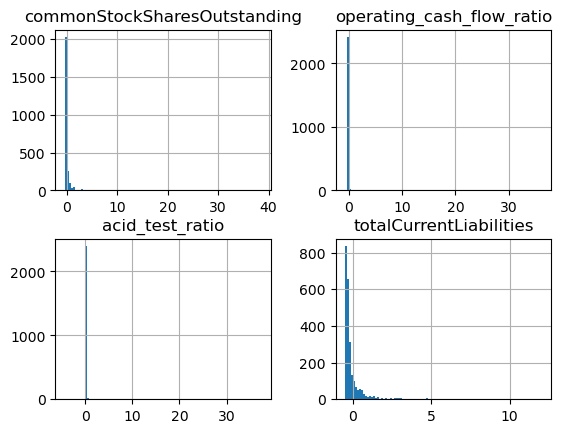

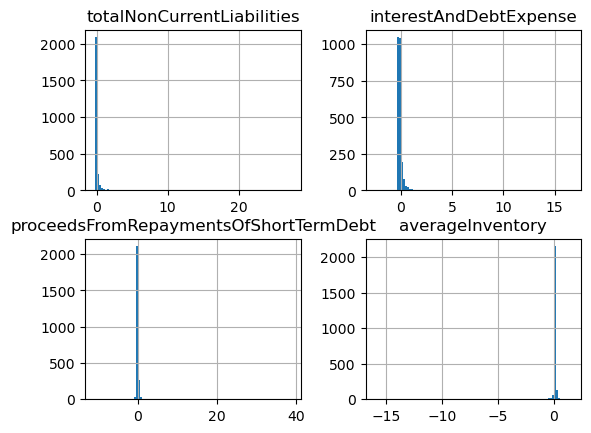

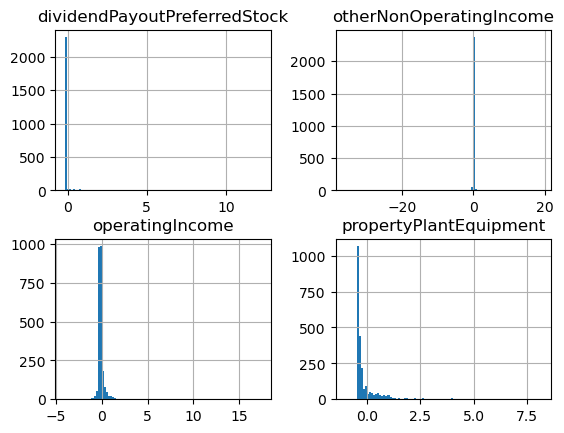

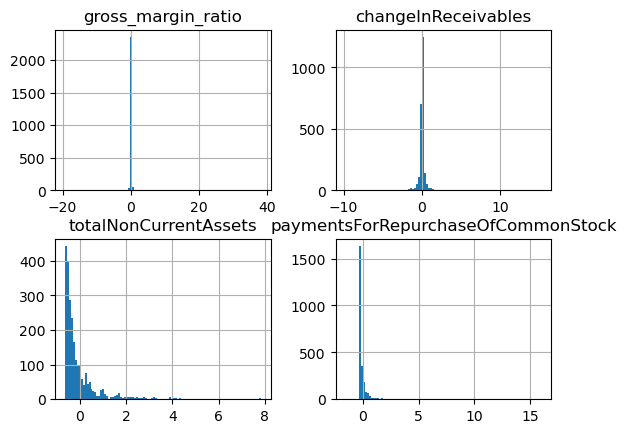

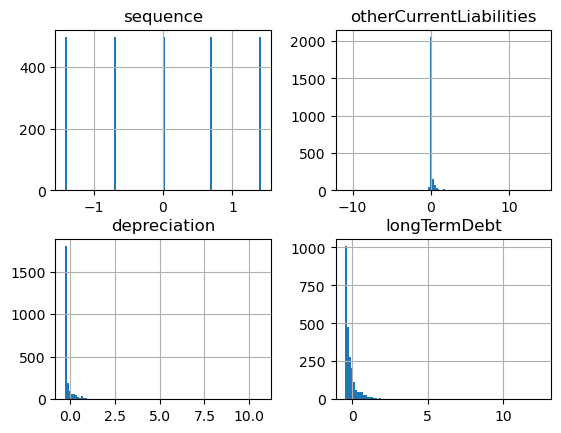

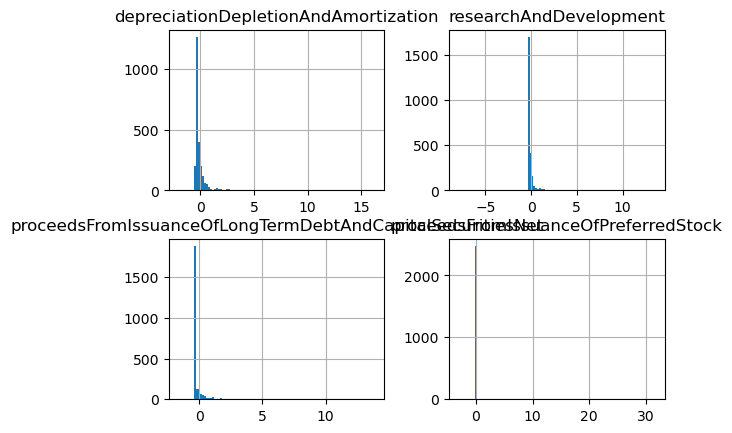

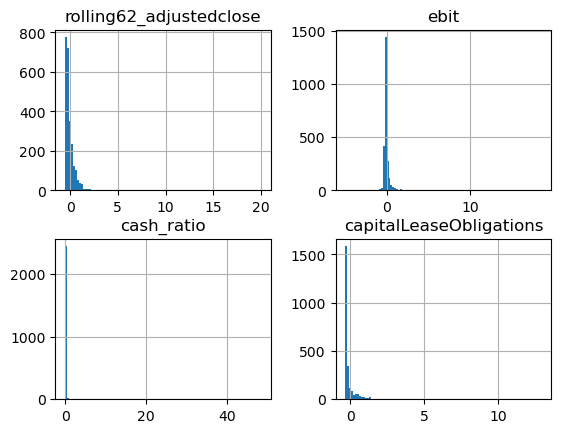

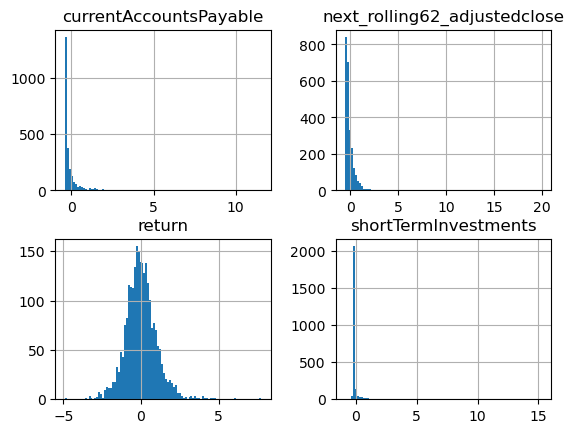

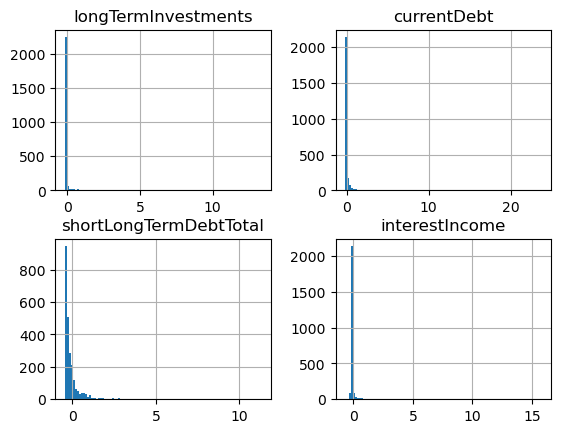

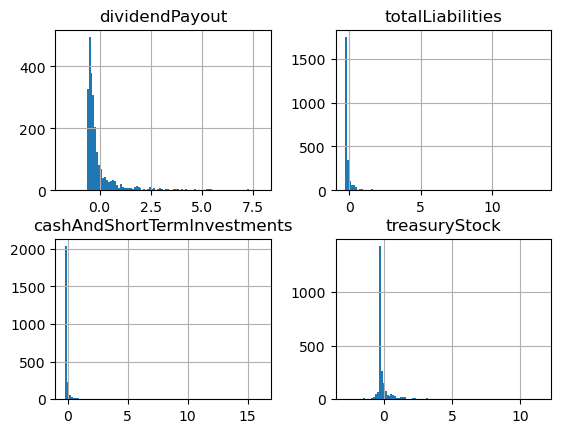

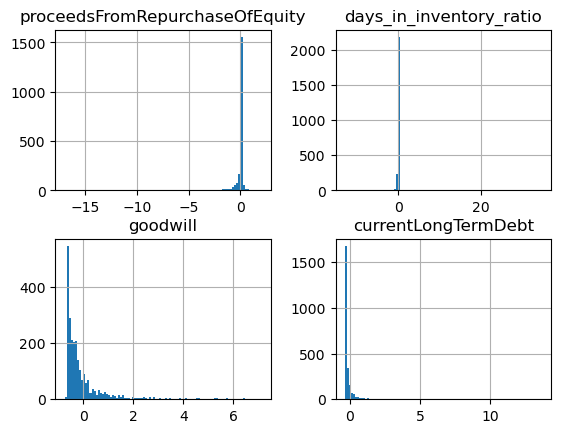

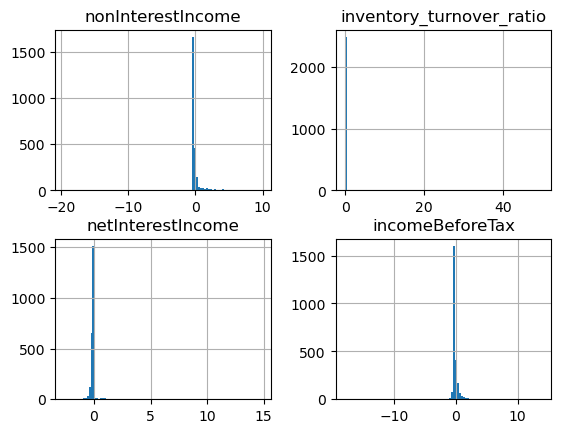

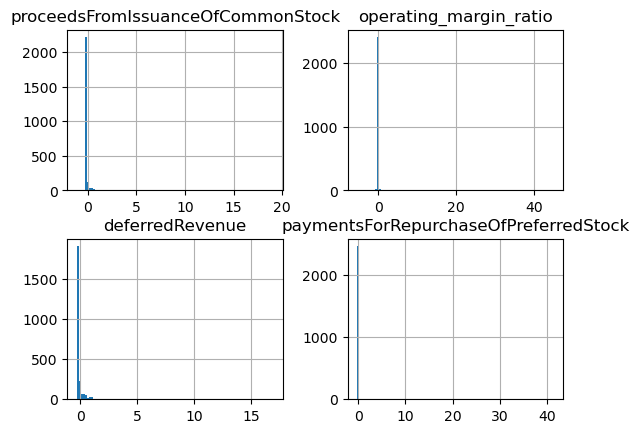

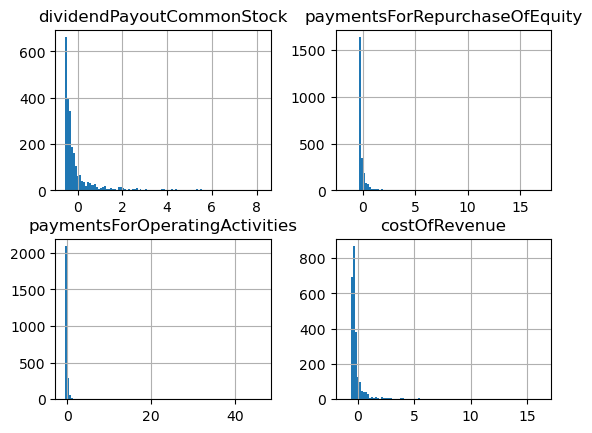

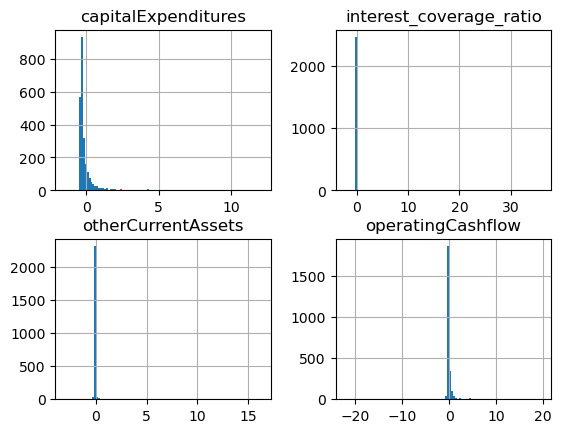

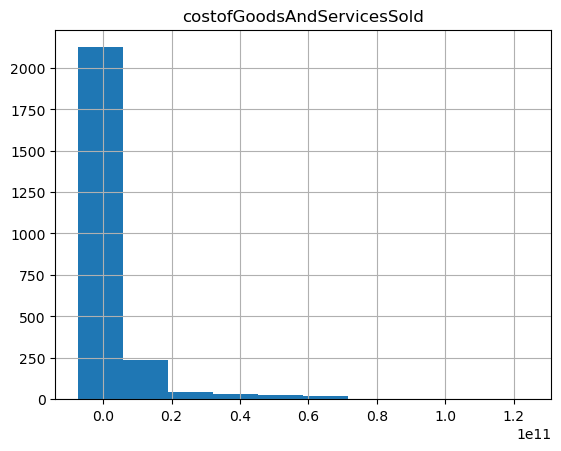

In [135]:
#plot the non boolean numerical variables to look at distributions 
#NOTE some distributions look squished due to the "cookie cutter" method to quickly look at all of them. 

booleanvars = [col for col in dfnum.columns if set(dfnum[col].unique()).issubset({0,1})]
#print(len(booleanvars))
nonbooleanvars = list(set(num_vars)-set(booleanvars))
cols = dfnum[nonbooleanvars].columns
dfnum_normalized = (dfnum - dfnum.mean())/dfnum.std()
print(len(cols))

#plot the non boolean numerical variables to look at distributions 
#NOTE some distributions look squished due to the "cookie cutter" method to quickly look at all of them. 
cols = dfnum[nonbooleanvars].columns

#print out histograms of the nonboolean numeric columns in sets of 4 
for i in range(26):
    temp = dfnum_normalized[cols[4*i:4*i+4]]
    temp.hist(bins=100)
# #get the remaining leftover column... 
temp = dfnum[cols[-1:]]
temp.hist()



In [136]:
desc = dfnum_normalized.describe()
desc = desc.T
#for i in range(0,100,20):
desc.sort_values('max',ascending=False,inplace=True)
desc #.iloc[i:i+5]

,count,mean,std,min,25%,50%,75%,max
inventory_turnover_ratio,"2,480.00",0.00,1.00,-0.02,-0.02,-0.02,-0.02,49.78
cash_ratio,"2,480.00",-0.00,1.00,-0.06,-0.05,-0.05,-0.04,48.38
paymentsForOperatingActivities,"2,480.00",-0.00,1.00,-0.50,-0.10,-0.09,-0.07,46.19
operating_margin_ratio,"2,480.00",0.00,1.00,-5.32,-0.03,-0.02,-0.01,45.04
paymentsForRepurchaseOfPreferredStock,"2,480.00",-0.00,1.00,-0.14,-0.05,-0.05,-0.05,41.29
...,...,...,...,...,...,...,...,...
proceedsFromRepurchaseOfEquity,"2,480.00",0.00,1.00,-16.96,0.05,0.24,0.26,2.03
inventory,"2,480.00",-0.00,1.00,-16.22,0.09,0.09,0.11,1.59
averageInventory,"2,480.00",0.00,1.00,-15.97,0.09,0.09,0.11,1.58
sequence,"2,480.00",0.00,1.00,-1.41,-0.71,0.00,0.71,1.41


In [137]:
def prep_for_classifier(df):
    df = df[df['sequence']!=5]

    #keeping return in ML would mean data leakage. 
    df = df.drop('return',axis=1) #we will use this later. But we would not know this in advance. 
    #pulling out sequence separately. we do not want to normalize this particular column. 
    seqvar = pd.DataFrame(df['sequence'])
    df = df.drop('sequence',axis=1)
    df = df.drop('next_rolling62_adjustedclose',axis=1) #we will use this for the regressor models 
    
    #borrowing some code from project 1 
    num_vars = df.select_dtypes(include=['float','int']).columns
    cat_vars = df.select_dtypes(include=['object']).columns
    dfnum = df[num_vars]
    booleanvars = [col for col in dfnum.columns if set(dfnum[col].unique()).issubset({0,1})]
    #print(len(booleanvars))
    nonbooleanvars = list(set(num_vars)-set(booleanvars))
    

    #create dummy variables for the categorical variable set then drop the original categorical non numerical columns
    l = [df[cat_vars]]
    for i in range(len(cat_vars)):
        temp = cat_vars[i]
        catout = pd.get_dummies(df[temp],prefix=temp,prefix_sep='_',dummy_na=True,drop_first=True)
        l.append(catout)
    dfcat=pd.concat(l,axis=1)
    dfcat=dfcat.drop(columns=cat_vars,axis=0)
    #print(df.shape)
    #print(dfcat.shape) #expecting an increase due to adding dummies. 
    cat_cols = dfcat.columns.tolist()
    for i in range(len(cat_cols)):
        dfcat[cat_cols[i]] = dfcat[cat_cols[i]].astype(int)
    
    df_bool = df[booleanvars]
    df_nonbool = df[nonbooleanvars]
    df_nonbool = (df_nonbool-df_nonbool.mean())/df_nonbool.std()
    new_df = pd.concat([dfcat,seqvar,df_nonbool,df_bool],axis=1)

    return new_df
def get_X_y_data(df,sequence):
    #print(df.shape)
    
    df = df[df['sequence']==sequence]
    #print(df.shape)
    df = df.drop('sequence',axis=1)
           
    X = df.iloc[:,:-1]

    #X.to_excel('X.xlsx')    
    #print(X.columns.tolist())
    y = df.iloc[:,-1:]
    y=y['better_than_spy'].values
    return X,y
    


In [138]:
mod_df= prep_for_classifier(df=df)
print(mod_df.shape)
print(mod_df['sequence'].unique())



(2480, 115)
[0 1 2 3 4]


In [139]:
X,y=get_X_y_data(mod_df,sequence=1)
print(X.shape)
print(y.shape)

(496, 113)
(496,)


In [140]:

def evaluate_classifier_model(model, X_test, Y_test): #, category_names=None):
    '''INPUT
    the machine learning model we built earlier
    X_test data
    Y_test data
    the category names (pulled from the Y_test dataframe)
    
    OUTPUT 
    excel metric files on how well each category performed, including 
    -accuracy
    -precision
    -recall
    -the F1 score
    
    the output files are later used in some visuals in the Flask app
       
    '''

    y_pred = model.predict(X_test)

        
    accuracy=accuracy_score(Y_test,y_pred)
    precision=precision_score(Y_test,y_pred,average='weighted',zero_division=1)
    recall=recall_score(Y_test,y_pred,average='weighted')
    f1score = f1_score(Y_test,y_pred,average='weighted')    
    print('\nscores:')
    temp ={  'model':model,
           #'sequence':sequence, 
           'Accurancy':accuracy,
                    'Precision':precision,
                    'Recall':recall,
                    'F1 Score':f1score}
    print(temp)
    return temp

In [141]:
#borrowing some code from my first project to save a little time and baking it into a definition
def get_top_n_important_features(df_train,model,n):
    feature_importances = list(zip(df_train.columns.tolist(), model.feature_importances_))

    df_feature_importances = pd.DataFrame(feature_importances, columns=['Feature', 'Model Weight'])
    filtered_features =df_feature_importances[df_feature_importances['Model Weight']>0] #screening out the lower rated features 
    sorted_features=filtered_features.sort_values(['Model Weight'],ascending=[False])
    top_n = sorted_features[:n] #looking at the top 10 

    top_n = top_n.reset_index()
    top_n = top_n.drop('index',axis=1)
    top_n.index += 1 #make the first number 1 since we're looking at a top 10.
    top_n[['Feature','Model Weight']]
    
    return top_n

In [142]:
#top features to pull out in descending rank order (using above def in each model)
topfeatures = 30

In [163]:

########################################################################################################
#train a generic Random Forest (default parameters) model to then look at model decay in future quarters 
#in other words, use the same model on successive quarters without retraining with new data. 
################################################################################################



dfout = prep_for_classifier(df)
X,y=get_X_y_data(dfout,sequence=sequences[0])
print('shapes')
print(dfout.shape,X.shape,y.shape)

### starting ML ##############
#split into train/test sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=42)
#train a "no frills Random Forest Classifier"
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

top_n_rf =get_top_n_important_features(X_train,model=rf,n=topfeatures)
# print('top 20 features using the no frills random forest classifier')
# print(top_n)
#evaluate_model(model=rf, X_test=X_test, Y_test=y_test)

####################################################################################################
#look at decay.. accuracy, precision, recall, F1 scores without training a new model with new data
####################################################################################################
l=[]

for j in range(len(sequences)):
    print('\n\n\nsequence:',j)
    #dfout,X,y = prep_for_classifier(df,sequence=sequences[j])
    X,y=get_X_y_data(dfout,sequence=sequences[j])
    print('shapes')
    print(dfout.shape,X.shape,y.shape)

    ### starting ML ##############
    #split into train/test sets 
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=42)
    try:
        evaluate_classifier_model(model=rf, X_test=X_test, Y_test=y_test)
        
        
    except Exception as e:
        print(e)


shapes
(2480, 115) (496, 113) (496,)



sequence: 0
shapes
(2480, 115) (496, 113) (496,)

scores:
{'model': RandomForestClassifier(random_state=42), 'Accurancy': 0.52, 'Precision': 0.52, 'Recall': 0.52, 'F1 Score': 0.52}



sequence: 1
shapes
(2480, 115) (496, 113) (496,)

scores:
{'model': RandomForestClassifier(random_state=42), 'Accurancy': 0.48, 'Precision': 0.5229545454545454, 'Recall': 0.48, 'F1 Score': 0.4856362906463268}



sequence: 2
shapes
(2480, 115) (496, 113) (496,)

scores:
{'model': RandomForestClassifier(random_state=42), 'Accurancy': 0.45, 'Precision': 0.4549671592775041, 'Recall': 0.45, 'F1 Score': 0.44696741854636585}



sequence: 3
shapes
(2480, 115) (496, 113) (496,)

scores:
{'model': RandomForestClassifier(random_state=42), 'Accurancy': 0.45, 'Precision': 0.5428571428571428, 'Recall': 0.45, 'F1 Score': 0.47804878048780486}



sequence: 4
shapes
(2480, 115) (496, 113) (496,)

scores:
{'model': RandomForestClassifier(random_state=42), 'Accurancy': 0.52, 'Precision

looking at the scores from the 4 sequences we can see that the accuracy dropped from 64.6 in the first sequence (quarter) to 49.0 in the last one. Precision dropped from 67.2 to 54.3. 

In [164]:
#what if we try a different machine learning classifier? 

########################################################################################################
#train a generic Gradient Boosting Classifier (default parameters) model to then look at model decay in future quarters 
#in other words, use the same model on successive quarters without retraining with new data. 
################################################################################################



dfout = prep_for_classifier(df)
X,y=get_X_y_data(dfout,sequence=sequences[0])
print('shapes')
print(dfout.shape,X.shape,y.shape)

### starting ML ##############
#split into train/test sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=42)

#train a "no frills GradientBoostingClassifier"
#rf = RandomForestClassifier(random_state=42)
#rf.fit(X_train,y_train)
gbc =GradientBoostingClassifier(random_state=42)
gbc.fit(X_train,y_train)
top_n_gbc =get_top_n_important_features(X_train,model=gbc,n=topfeatures)

#evaluate_model(model=rf, X_test=X_test, Y_test=y_test)

####################################################################################################
#look at decay.. accuracy, precision, recall, F1 scores without training a new model with new data
####################################################################################################
for j in range(len(sequences)):
    print('\n\n\nsequence:',j)
    #dfout,X,y = prep_for_classifier(df,sequence=sequences[j])
    X,y=get_X_y_data(dfout,sequence=sequences[j])
    print('shapes')
    print(dfout.shape,X.shape,y.shape)

    ### starting ML ##############
    #split into train/test sets 
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=42)
    nans = X_train.isna().sum()
    print('nans over zero?',nans[nans>0])
    try:
        evaluate_classifier_model(model=gbc, X_test=X_test, Y_test=y_test)
    except Exception as e:
        print(e)


shapes
(2480, 115) (496, 113) (496,)



sequence: 0
shapes
(2480, 115) (496, 113) (496,)
nans over zero? Series([], dtype: int64)

scores:
{'model': GradientBoostingClassifier(random_state=42), 'Accurancy': 0.49, 'Precision': 0.4905769230769231, 'Recall': 0.49, 'F1 Score': 0.4898469846984698}



sequence: 1
shapes
(2480, 115) (496, 113) (496,)
nans over zero? Series([], dtype: int64)

scores:
{'model': GradientBoostingClassifier(random_state=42), 'Accurancy': 0.51, 'Precision': 0.5515555555555556, 'Recall': 0.51, 'F1 Score': 0.5158597125916994}



sequence: 2
shapes
(2480, 115) (496, 113) (496,)
nans over zero? Series([], dtype: int64)

scores:
{'model': GradientBoostingClassifier(random_state=42), 'Accurancy': 0.46, 'Precision': 0.46420202020202017, 'Recall': 0.46, 'F1 Score': 0.45913565426170466}



sequence: 3
shapes
(2480, 115) (496, 113) (496,)
nans over zero? Series([], dtype: int64)

scores:
{'model': GradientBoostingClassifier(random_state=42), 'Accurancy': 0.53, 'Precision': 0

The gradient booster classifier - using default values and no grid search - does a little better in the first sequence than the random forest with 66.6 accuracy and 68.8 precision. But, using the same model in successive quarters without retraining shows a steeper decay with the last sequence's accuracy at only 47.1 and precision of 52.3. Conclusion: we will need to retrain data for classifiers to attempt to avert potential score declines.  

In [145]:
top_n_rf

,Feature,Model Weight
1,investmentIncomeNet,0.02
2,rolling62_adjustedclose,0.02
3,debt_to_equity_ratio,0.02
4,cashflowFromFinancing,0.02
5,currentNetReceivables,0.02
6,longTermInvestments,0.02
7,changeInExchangeRate,0.02
8,totalShareholderEquity,0.02
9,changeInInventory,0.02
10,debt_ratio,0.02


In [146]:

top_n_gbc

,Feature,Model Weight
1,rolling62_adjustedclose,0.07
2,debt_ratio,0.05
3,investmentIncomeNet,0.05
4,investments,0.04
5,gics_sector_Utilities,0.04
6,changeInExchangeRate,0.03
7,current_ratio,0.03
8,shortLongTermDebtTotal,0.03
9,days_in_inventory_ratio,0.03
10,propertyPlantEquipment,0.03


In [147]:
#combined "best of both lists to use as feature subset"
topfilter1 = top_n_rf[top_n_rf['Model Weight']>0.01]
topfilter1 = topfilter1['Feature'].tolist()

type(top_n_gbc)

topfilter2 = top_n_gbc[top_n_gbc['Model Weight']>.02]
topfilter2 = topfilter2['Feature'].tolist()

combinedfilter = set(topfilter1).union(set(topfilter2))
combinedfilter = list(combinedfilter)

In [148]:
#correlations of features seem reasonably low. nothing more than in the .60s
corr = dfout[combinedfilter].corr()
corr.iloc[:,20:] #note - checked in 2 sets since otherwise middle ones don't show. 

,changeInOperatingLiabilities,inventory_turnover_ratio,cashflowFromInvestment,grossProfit,totalCurrentAssets,operating_margin_ratio,totalShareholderEquity,roe_ratio,changeInOperatingAssets,costOfRevenue,operating_cash_flow_ratio,interest_coverage_ratio,acid_test_ratio,operatingCashflow
investments,-0.04,0.00,0.19,0.06,0.54,-0.01,0.48,0.00,0.05,0.12,0.01,-0.01,0.08,0.15
averageInventory,0.35,0.00,0.16,-0.02,-0.65,-0.00,-0.39,0.00,-0.32,-0.06,0.00,0.00,-0.07,-0.04
sellingGeneralAndAdministrative,0.04,-0.01,-0.18,0.45,0.34,-0.00,0.41,0.01,0.06,0.64,-0.02,-0.02,-0.00,0.31
propertyPlantEquipment,0.01,-0.01,-0.22,0.53,0.23,-0.00,0.47,0.01,0.05,0.30,-0.02,-0.02,-0.03,0.30
debt_to_equity_ratio,-0.00,-0.00,0.00,-0.01,0.01,0.01,0.00,0.24,0.00,-0.00,-0.00,-0.00,0.01,0.00
cashflowFromFinancing,0.08,0.00,-0.06,-0.17,-0.28,0.00,-0.26,-0.01,0.29,-0.13,0.01,0.00,0.02,-0.49
retainedEarnings,-0.07,-0.00,-0.11,0.66,0.72,-0.00,0.87,0.01,0.17,0.24,-0.01,-0.01,0.03,0.33
rolling62_adjustedclose,0.01,-0.01,0.00,0.01,-0.02,-0.00,-0.04,0.02,-0.00,-0.01,-0.01,-0.02,-0.02,0.00
changeInExchangeRate,0.09,0.00,0.15,-0.04,-0.23,-0.02,-0.08,-0.00,-0.18,-0.06,0.00,0.00,-0.02,0.01
investmentIncomeNet,-0.12,-0.00,-0.18,0.19,0.56,0.00,0.36,0.00,0.30,0.18,-0.00,-0.01,-0.02,0.16


In [165]:
########################################################################################################
#train a generic Random Forest with the subset of features (still using default parameters)  to then look at model decay in future quarters 
#in other words, use the same model on successive quarters without retraining with new data. 
################################################################################################


dfout = prep_for_classifier(df)
X,y=get_X_y_data(dfout,sequence=sequences[0])
X = X[combinedfilter]
print('shapes')
print(dfout.shape,X.shape,y.shape)

### starting ML ##############
#split into train/test sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=42)
#train a "no frills Random Forest Classifier"
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)



top_n_rf =get_top_n_important_features(X_train,model=rf,n=10)
# print('top 20 features using the no frills random forest classifier')
# print(top_n)
#evaluate_model(model=rf, X_test=X_test, Y_test=y_test)

####################################################################################################
#look at decay.. accuracy, precision, recall, F1 scores without training a new model with new data
####################################################################################################
l=[]

for j in range(len(sequences)):
    print('\n\n\nsequence:',j)
    #dfout,X,y = prep_for_classifier(df,sequence=sequences[j])
    X,y=get_X_y_data(dfout,sequence=sequences[j])
    X = X[combinedfilter]
    print('shapes')
    print(dfout.shape,X.shape,y.shape)

    ### starting ML ##############
    #split into train/test sets 
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=42)
    try:
        evaluate_classifier_model(model=rf, X_test=X_test, Y_test=y_test)
        
        
    except Exception as e:
        print(e)


shapes
(2480, 115) (496, 34) (496,)



sequence: 0
shapes
(2480, 115) (496, 34) (496,)

scores:
{'model': RandomForestClassifier(random_state=42), 'Accurancy': 0.49, 'Precision': 0.48979166666666674, 'Recall': 0.49, 'F1 Score': 0.48984686217595835}



sequence: 1
shapes
(2480, 115) (496, 34) (496,)

scores:
{'model': RandomForestClassifier(random_state=42), 'Accurancy': 0.47, 'Precision': 0.5197436957420422, 'Recall': 0.47, 'F1 Score': 0.4733420078070263}



sequence: 2
shapes
(2480, 115) (496, 34) (496,)

scores:
{'model': RandomForestClassifier(random_state=42), 'Accurancy': 0.46, 'Precision': 0.46672672672672677, 'Recall': 0.46, 'F1 Score': 0.45127272727272727}



sequence: 3
shapes
(2480, 115) (496, 34) (496,)

scores:
{'model': RandomForestClassifier(random_state=42), 'Accurancy': 0.51, 'Precision': 0.5686316659776768, 'Recall': 0.51, 'F1 Score': 0.5318464431906185}



sequence: 4
shapes
(2480, 115) (496, 34) (496,)

scores:
{'model': RandomForestClassifier(random_state=42), 'Accu

In [166]:
########################################################################################################
#train a generic Gradient Boosting Classifier with the subset of features (still using default parameters)  to then look at model decay in future quarters 
#in other words, use the same model on successive quarters without retraining with new data. 
################################################################################################

dfout = prep_for_classifier(df)
X,y=get_X_y_data(dfout,sequence=sequences[0])
X = X[combinedfilter]
print('shapes')
print(dfout.shape,X.shape,y.shape)

### starting ML ##############
#split into train/test sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=42)
#train a "no frills Random Forest Classifier"

gbc =GradientBoostingClassifier(random_state=42)
gbc.fit(X_train,y_train)
top_n_gbc =get_top_n_important_features(X_train,model=gbc,n=20)

# print('top 20 features using the no frills random forest classifier')
# print(top_n)
#evaluate_model(model=rf, X_test=X_test, Y_test=y_test)

####################################################################################################
#look at decay.. accuracy, precision, recall, F1 scores without training a new model with new data
####################################################################################################
l=[]

for j in range(len(sequences)):
    print('\n\n\nsequence:',j)
    #dfout,X,y = prep_for_classifier(df,sequence=sequences[j])
    X,y=get_X_y_data(dfout,sequence=sequences[j])
    X = X[combinedfilter]
    print('shapes')
    print(dfout.shape,X.shape,y.shape)

    ### starting ML ##############
    #split into train/test sets 
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=42)
    try:
        evaluate_classifier_model(model=rf, X_test=X_test, Y_test=y_test)
        
        
    except Exception as e:
        print(e)


shapes
(2480, 115) (496, 34) (496,)



sequence: 0
shapes
(2480, 115) (496, 34) (496,)

scores:
{'model': RandomForestClassifier(random_state=42), 'Accurancy': 0.49, 'Precision': 0.48979166666666674, 'Recall': 0.49, 'F1 Score': 0.48984686217595835}



sequence: 1
shapes
(2480, 115) (496, 34) (496,)

scores:
{'model': RandomForestClassifier(random_state=42), 'Accurancy': 0.47, 'Precision': 0.5197436957420422, 'Recall': 0.47, 'F1 Score': 0.4733420078070263}



sequence: 2
shapes
(2480, 115) (496, 34) (496,)

scores:
{'model': RandomForestClassifier(random_state=42), 'Accurancy': 0.46, 'Precision': 0.46672672672672677, 'Recall': 0.46, 'F1 Score': 0.45127272727272727}



sequence: 3
shapes
(2480, 115) (496, 34) (496,)

scores:
{'model': RandomForestClassifier(random_state=42), 'Accurancy': 0.51, 'Precision': 0.5686316659776768, 'Recall': 0.51, 'F1 Score': 0.5318464431906185}



sequence: 4
shapes
(2480, 115) (496, 34) (496,)

scores:
{'model': RandomForestClassifier(random_state=42), 'Accu

In [167]:
########################################################################################################
#now retrain a generic Random Forest with the subset of features (still using default parameters) 
#for each quarter  
################################################################################################


dfout = prep_for_classifier(df)
X,y=get_X_y_data(dfout,sequence=sequences[0])
X = X[combinedfilter]
print('shapes')
print(dfout.shape,X.shape,y.shape)


####################################################################################################
#look at decay.. accuracy, precision, recall, F1 scores without training a new model with new data
####################################################################################################
l=[]

for j in range(len(sequences)):
    print('\n\n\nsequence:',j)
    #dfout,X,y = prep_for_classifier(df,sequence=sequences[j])
    X,y=get_X_y_data(dfout,sequence=sequences[j])
    X = X[combinedfilter]
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train,y_train)
    print('shapes')
    print(dfout.shape,X.shape,y.shape)

    ### starting ML ##############
    #split into train/test sets 
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=42)
    try:
        evaluate_classifier_model(model=rf, X_test=X_test, Y_test=y_test)
        
        
    except Exception as e:
        print(e)


shapes
(2480, 115) (496, 34) (496,)



sequence: 0
shapes
(2480, 115) (496, 34) (496,)

scores:
{'model': RandomForestClassifier(random_state=42), 'Accurancy': 0.52, 'Precision': 0.5187644787644787, 'Recall': 0.52, 'F1 Score': 0.5117747858017136}



sequence: 1
shapes
(2480, 115) (496, 34) (496,)

scores:
{'model': RandomForestClassifier(random_state=42), 'Accurancy': 0.47, 'Precision': 0.5197436957420422, 'Recall': 0.47, 'F1 Score': 0.4733420078070263}



sequence: 2
shapes
(2480, 115) (496, 34) (496,)

scores:
{'model': RandomForestClassifier(random_state=42), 'Accurancy': 0.61, 'Precision': 0.6271491228070175, 'Recall': 0.61, 'F1 Score': 0.581598427775958}



sequence: 3
shapes
(2480, 115) (496, 34) (496,)

scores:
{'model': RandomForestClassifier(random_state=42), 'Accurancy': 0.52, 'Precision': 0.5822988505747126, 'Recall': 0.52, 'F1 Score': 0.5421538461538461}



sequence: 4
shapes
(2480, 115) (496, 34) (496,)

scores:
{'model': RandomForestClassifier(random_state=42), 'Accurancy

In [168]:
########################################################################################################
#retrain a generic Gradient Boosting Classifier with the subset of features (still using default parameters) 
#each quarter  
################################################################################################


# dfout = prep_for_classifier(df)
# X,y=get_X_y_data(dfout,sequence=sequences[0])
# X = X[combinedfilter]
print('shapes')
print(dfout.shape,X.shape,y.shape)


####################################################################################################
#look at decay.. accuracy, precision, recall, F1 scores without training a new model with new data
####################################################################################################
l=[]

for j in range(len(sequences)):
    print('\n\n\nsequence:',j)
    #dfout,X,y = prep_for_classifier(df,sequence=sequences[j])
    X,y=get_X_y_data(dfout,sequence=sequences[j])
    X = X[combinedfilter]
    print('shapes')
    print(dfout.shape,X.shape,y.shape)

    ### starting ML ##############
    #split into train/test sets 
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=42)
    gbc =GradientBoostingClassifier(random_state=42)
    gbc.fit(X_train,y_train)
    top_n_gbc =get_top_n_important_features(X_train,model=gbc,n=20)
    try:
        evaluate_classifier_model(model=gbc, X_test=X_test, Y_test=y_test)
        
        
    except Exception as e:
        print(e)


shapes
(2480, 115) (496, 34) (496,)



sequence: 0
shapes
(2480, 115) (496, 34) (496,)

scores:
{'model': GradientBoostingClassifier(random_state=42), 'Accurancy': 0.52, 'Precision': 0.52, 'Recall': 0.52, 'F1 Score': 0.52}



sequence: 1
shapes
(2480, 115) (496, 34) (496,)

scores:
{'model': GradientBoostingClassifier(random_state=42), 'Accurancy': 0.6, 'Precision': 0.5847619047619047, 'Recall': 0.6, 'F1 Score': 0.5885918003565063}



sequence: 2
shapes
(2480, 115) (496, 34) (496,)

scores:
{'model': GradientBoostingClassifier(random_state=42), 'Accurancy': 0.55, 'Precision': 0.5518, 'Recall': 0.55, 'F1 Score': 0.5504053648283456}



sequence: 3
shapes
(2480, 115) (496, 34) (496,)

scores:
{'model': GradientBoostingClassifier(random_state=42), 'Accurancy': 0.75, 'Precision': 0.7267904509283819, 'Recall': 0.75, 'F1 Score': 0.7160607455131155}



sequence: 4
shapes
(2480, 115) (496, 34) (496,)

scores:
{'model': GradientBoostingClassifier(random_state=42), 'Accurancy': 0.67, 'Precision':

In [153]:
# sequence: 3
# shapes
# (1984, 115) (496, 32) (496,)

# scores:
# {'model': RandomForestClassifier(random_state=42), 'Accurancy': 0.48,
#  'Precision': 0.5684615384615385, 'Recall': 0.48, 'F1 Score': 0.5064855687606112}

# Adding regression models to see if we can predict amount of change

In [169]:
def prep_for_regressor(df):
    df = df[df['sequence']!=5]

    #keeping return in ML would mean data leakage. 
    df = df.drop('return',axis=1) #we will use this later. But we would not know this in advance. 
    #pulling out sequence separately. we do not want to normalize this particular column. 
    seqvar = pd.DataFrame(df['sequence'])
    df = df.drop('sequence',axis=1)
    df=df.drop('better_than_spy',axis=1)
    
    #borrowing some code from project 1 
    num_vars = df.select_dtypes(include=['float','int']).columns
    cat_vars = df.select_dtypes(include=['object']).columns
    dfnum = df[num_vars]
    booleanvars = [col for col in dfnum.columns if set(dfnum[col].unique()).issubset({0,1})]
    #print(len(booleanvars))
    nonbooleanvars = list(set(num_vars)-set(booleanvars))
    

    #create dummy variables for the categorical variable set then drop the original categorical non numerical columns
    l = [df[cat_vars]]
    for i in range(len(cat_vars)):
        temp = cat_vars[i]
        catout = pd.get_dummies(df[temp],prefix=temp,prefix_sep='_',dummy_na=True,drop_first=True)
        l.append(catout)
    dfcat=pd.concat(l,axis=1)
    dfcat=dfcat.drop(columns=cat_vars,axis=0)
    #print(df.shape)
    #print(dfcat.shape) #expecting an increase due to adding dummies. 
    cat_cols = dfcat.columns.tolist()
    for i in range(len(cat_cols)):
        dfcat[cat_cols[i]] = dfcat[cat_cols[i]].astype(int)
    
    df_bool = df[booleanvars]
    df_nonbool = df[nonbooleanvars]
    df_nonbool = (df_nonbool-df_nonbool.mean())/df_nonbool.std()
    new_df = pd.concat([dfcat,seqvar,df_nonbool,df_bool],axis=1)

    return new_df
def get_X_y_data_regressor(df,sequence):
    #print(df.shape)
    
    df = df[df['sequence']==sequence]
    #print(df.shape)
    df = df.drop('sequence',axis=1)
           
    X = df #.iloc[:,:-1]
    X = X.drop('next_rolling62_adjustedclose',axis=1)

    #X.to_excel('X.xlsx')    
    #print(X.columns.tolist())
    y = df['next_rolling62_adjustedclose'].values
    y=df['next_rolling62_adjustedclose'].values
    #y=y['better_than_spy'].values
    return X,y
    


In [170]:
def evaluate_regressor_model(model, X_test, y_test): #, category_names=None):
    '''INPUT
    the machine learning model we built earlier
    X_test data
    Y_test data
    the category names (pulled from the Y_test dataframe)
    
    OUTPUT 
    excel metric files on how well each category performed, including 
    -accuracy
    -precision
    -recall
    -the F1 score
    
    the output files are later used in some visuals in the Flask app
       
    '''

    y_pred = model.predict(X_test)

        
    #source:https://stackoverflow.com/questions/50789508/random-forest-regression-how-do-i-analyse-its-performance-python-sklearn
    print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
    print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
    print('Accuracy:', round(100*(1 - mape), 2))
    print('Score:',r2_score(y_test, y_pred))
    #print(temp)
    #return temp

In [171]:
rdf = prep_for_regressor(df)
rdf.head()

,gics_sector_Consumer Discretionary,gics_sector_Consumer Staples,gics_sector_Energy,gics_sector_Financials,gics_sector_Health Care,gics_sector_Industrials,gics_sector_Information Technology,gics_sector_Materials,gics_sector_Real Estate,gics_sector_Utilities,...,paymentsForRepurchaseOfPreferredStock,dividendPayoutCommonStock,paymentsForRepurchaseOfEquity,paymentsForOperatingActivities,costOfRevenue,capitalExpenditures,interest_coverage_ratio,otherCurrentAssets,operatingCashflow,costofGoodsAndServicesSold
ticker,,,,,,,,,,,,,,,,,,,,,
MMM,0,0,0,0,0,1,0,0,0,0,...,-0.05,0.79,-0.30,-0.06,-0.00,-0.12,-0.04,-0.10,-0.04,0.10
MMM,0,0,0,0,0,1,0,0,0,0,...,-0.05,0.80,-0.19,-0.06,-0.03,-0.08,-0.04,-0.10,0.04,0.06
MMM,0,0,0,0,0,1,0,0,0,0,...,-0.05,0.75,0.08,-0.06,-0.05,-0.03,-0.04,-0.10,0.12,0.05
MMM,0,0,0,0,0,1,0,0,0,0,...,-0.05,0.76,-0.28,-0.06,-0.04,-0.05,-0.04,-0.10,-0.01,0.05
MMM,0,0,0,0,0,1,0,0,0,0,...,-0.05,0.76,-0.30,-0.06,-0.12,-0.12,-0.05,-0.10,0.04,0.05


In [172]:
rdf.columns.tolist()

['gics_sector_Consumer Discretionary',
 'gics_sector_Consumer Staples',
 'gics_sector_Energy',
 'gics_sector_Financials',
 'gics_sector_Health Care',
 'gics_sector_Industrials',
 'gics_sector_Information Technology',
 'gics_sector_Materials',
 'gics_sector_Real Estate',
 'gics_sector_Utilities',
 'gics_sector_nan',
 'sequence',
 'operatingExpenses',
 'investments',
 'totalAssets',
 'sellingGeneralAndAdministrative',
 'intangibleAssets',
 'comprehensiveIncomeNetOfTax',
 'accumulatedDepreciationAmortizationPPE',
 'totalRevenue',
 'debt_to_equity_ratio',
 'cashflowFromFinancing',
 'retainedEarnings',
 'longTermDebtNoncurrent',
 'intangibleAssetsExcludingGoodwill',
 'changeInCashAndCashEquivalents',
 'changeInExchangeRate',
 'commonStock',
 'investmentIncomeNet',
 'otherNonCurrentAssets',
 'inventory',
 'debt_ratio',
 'current_ratio',
 'currentNetReceivables',
 'shortTermDebt',
 'incomeTaxExpense',
 'changeInInventory',
 'grossProfit',
 'cashflowFromInvestment',
 'changeInOperatingLiabilit

/tmp/ipykernel_42358/1525834725.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


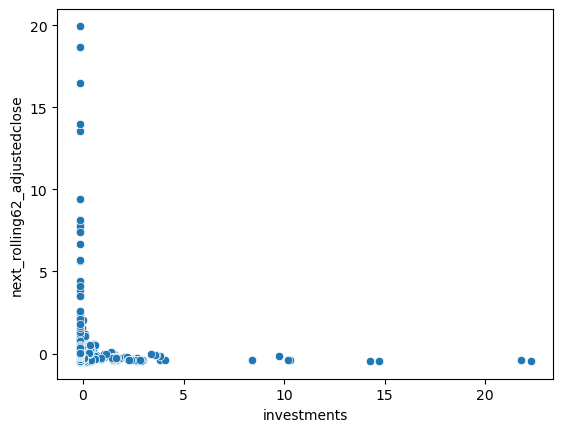

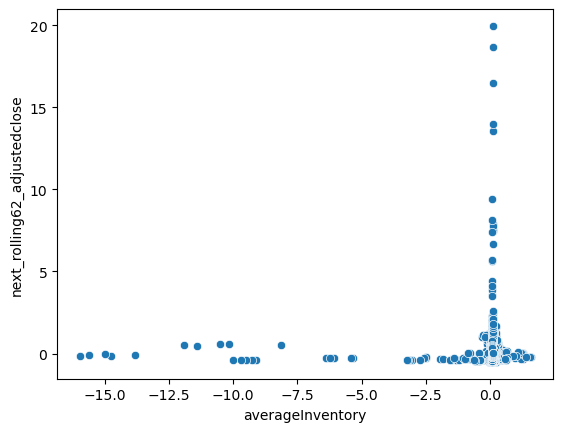

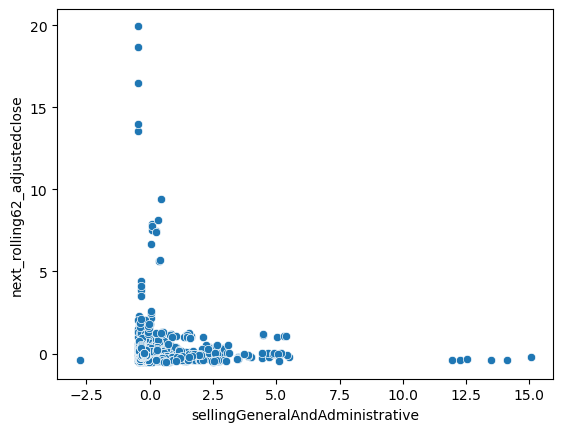

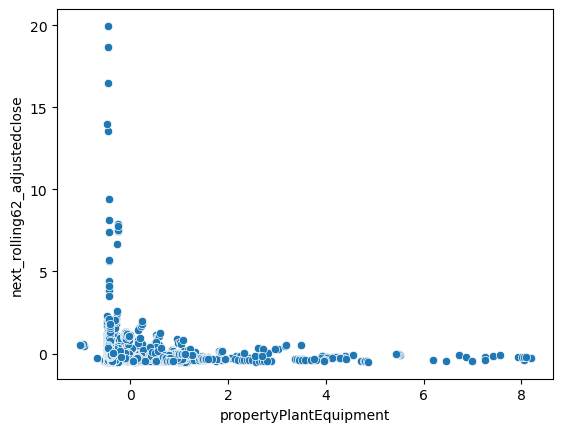

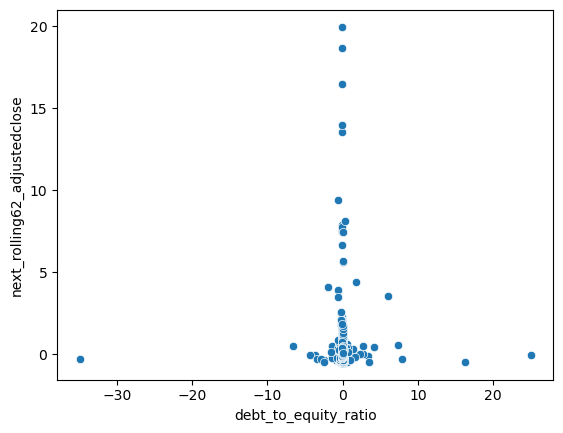

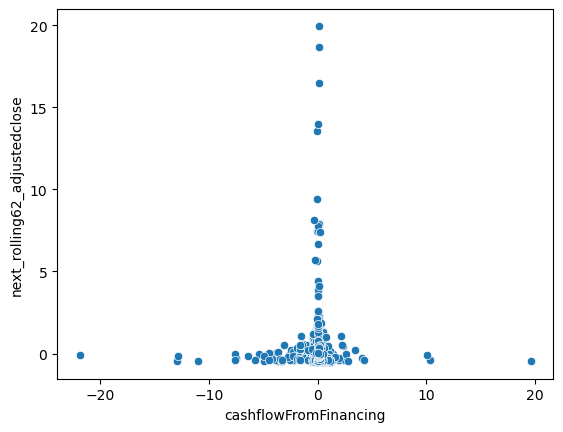

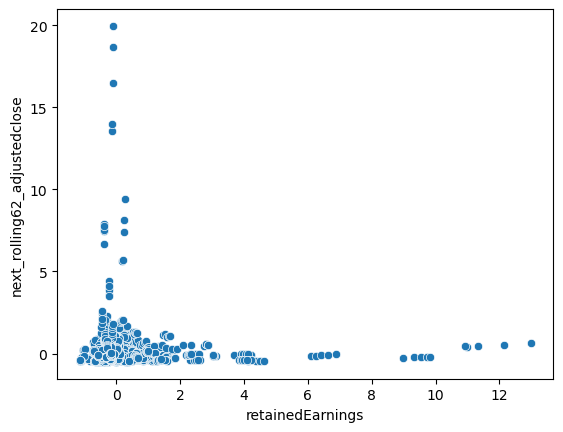

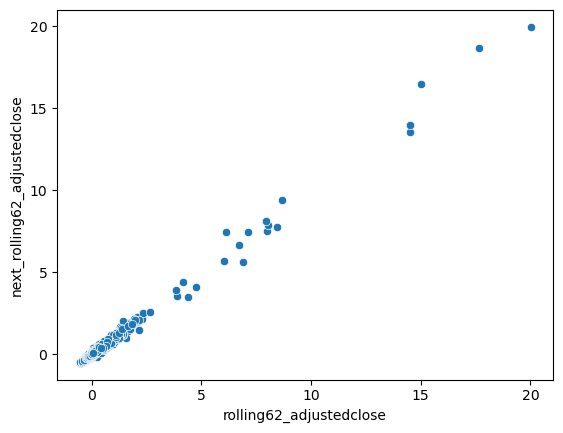

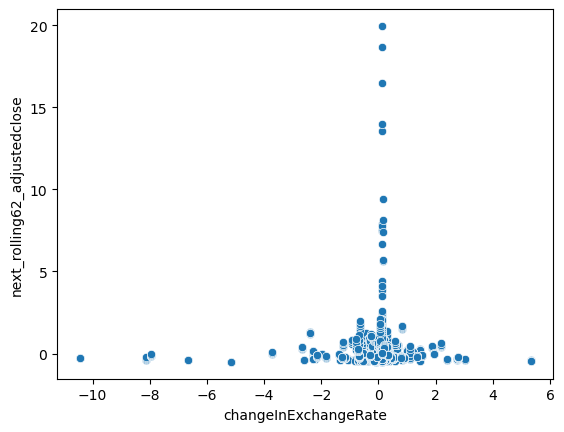

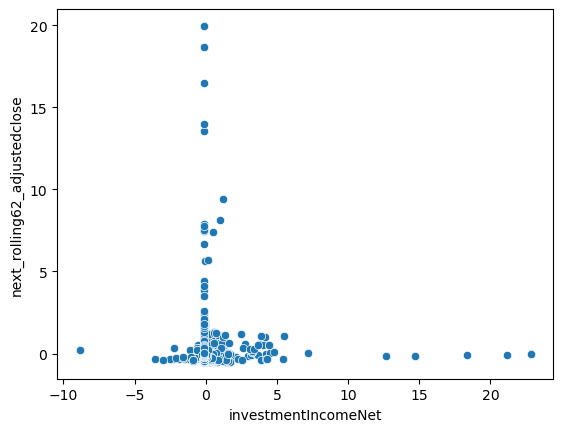

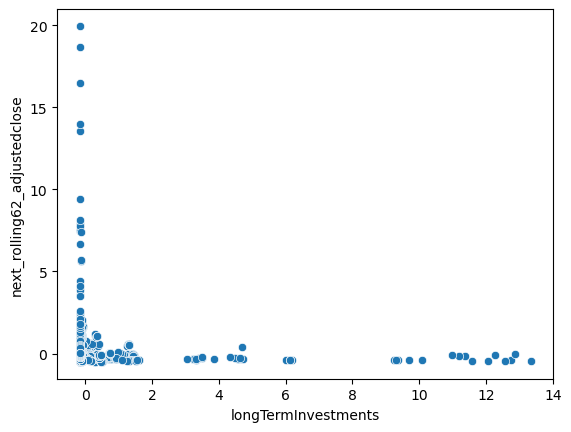

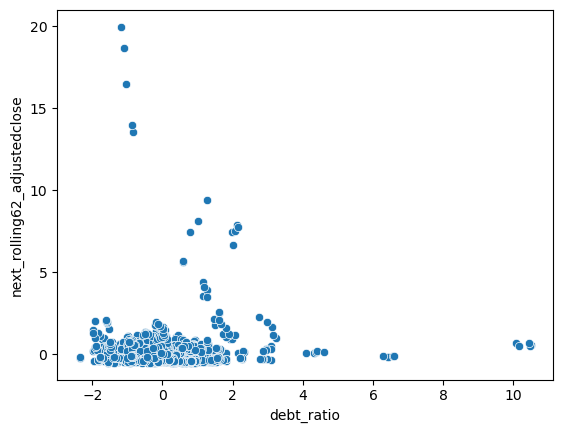

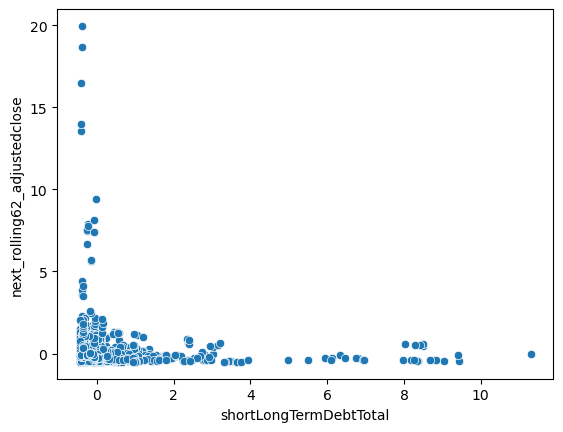

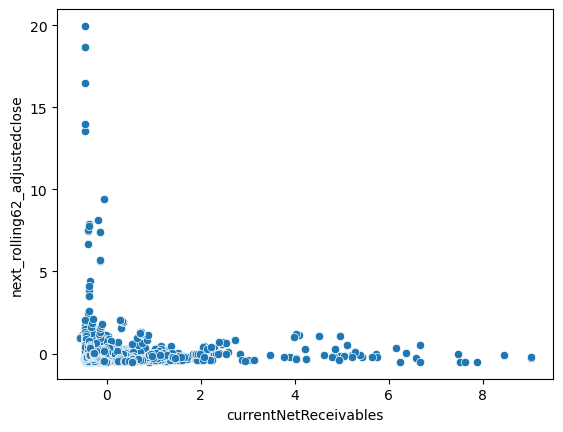

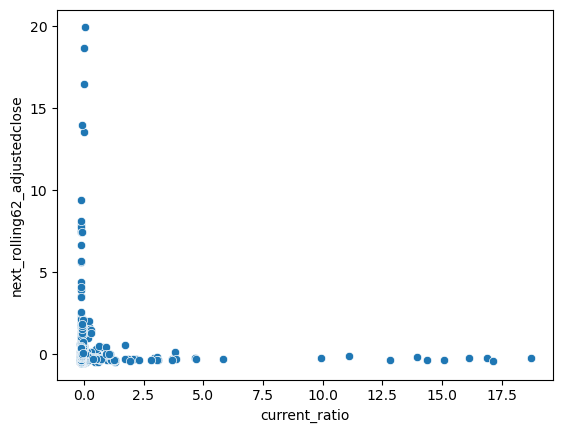

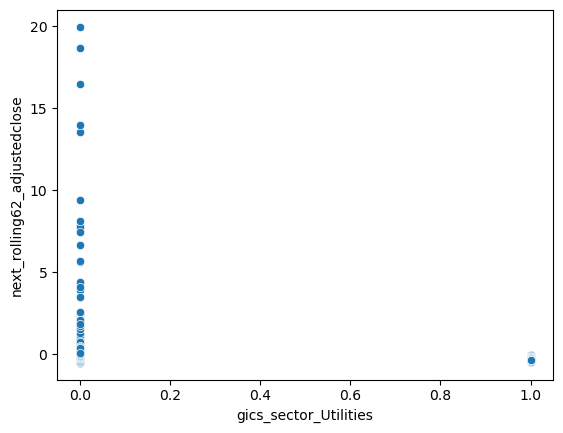

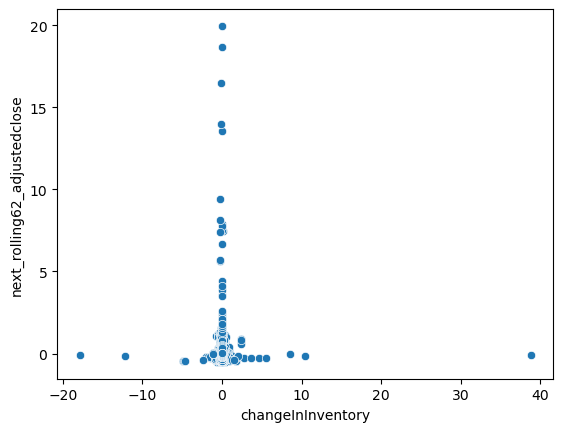

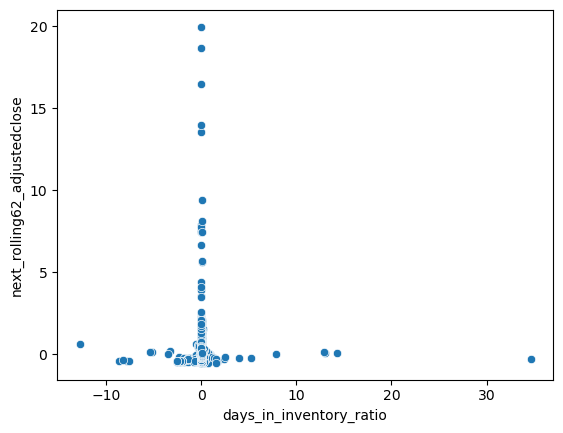

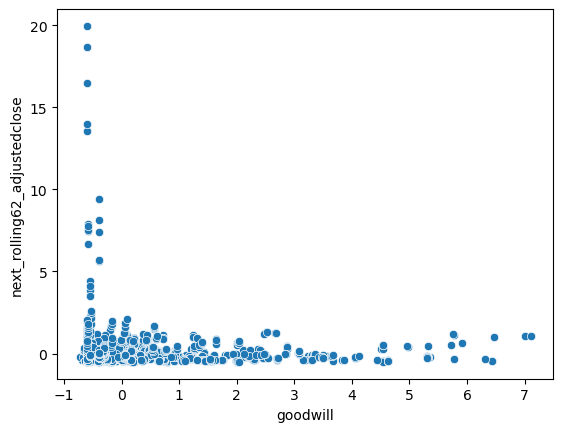

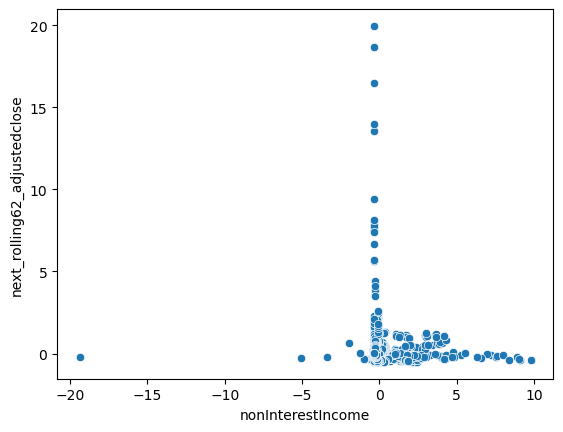

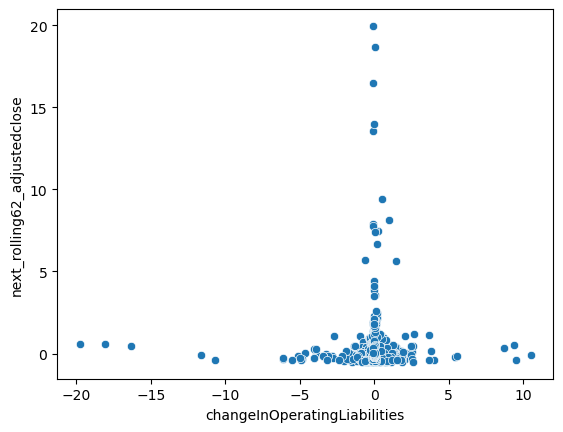

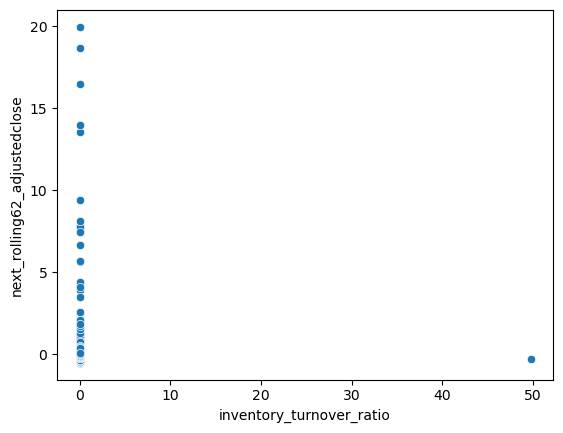

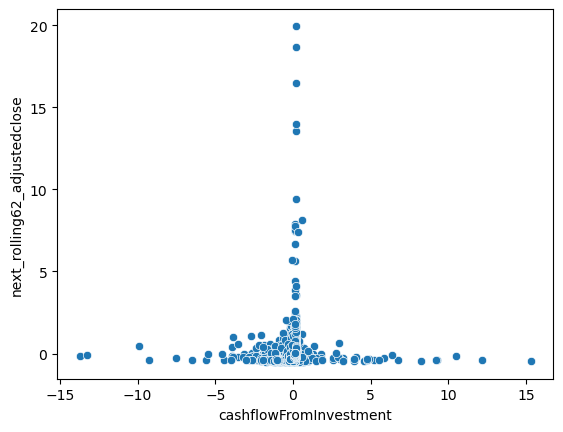

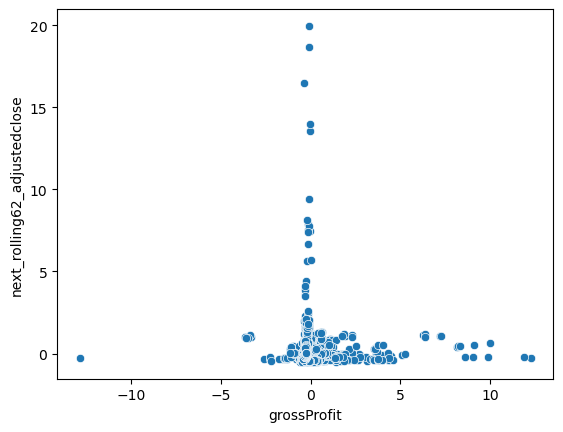

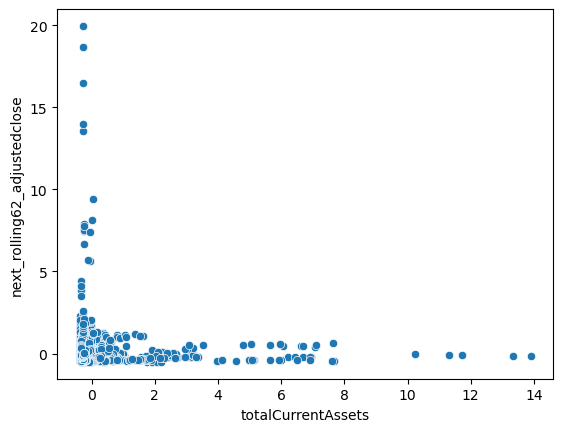

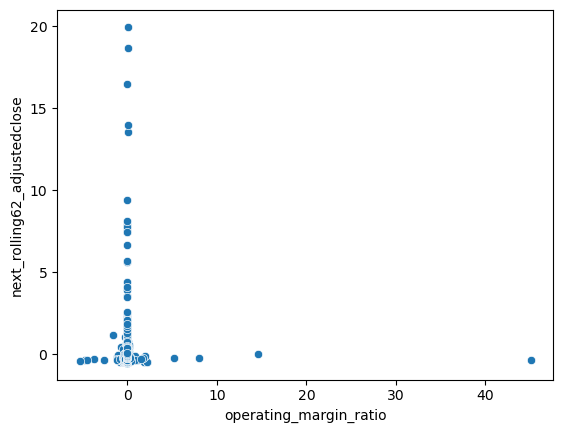

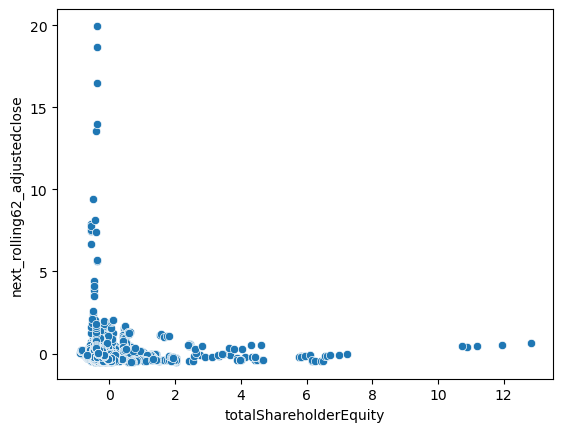

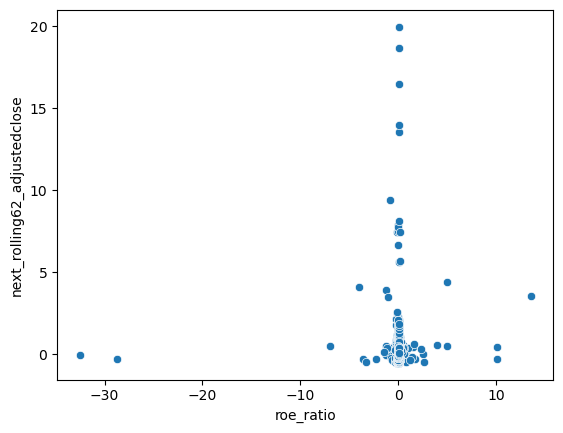

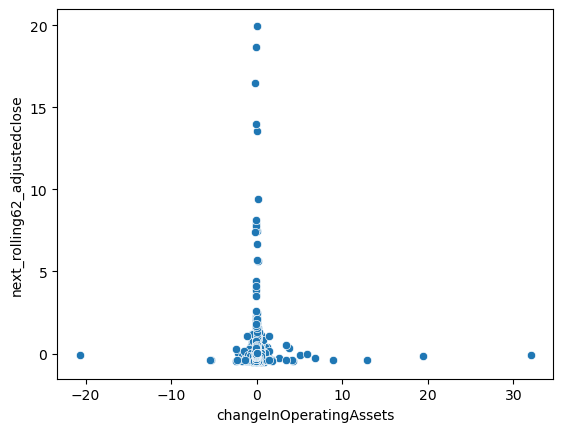

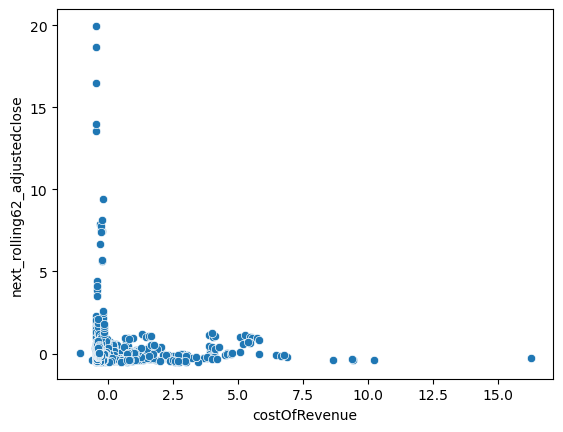

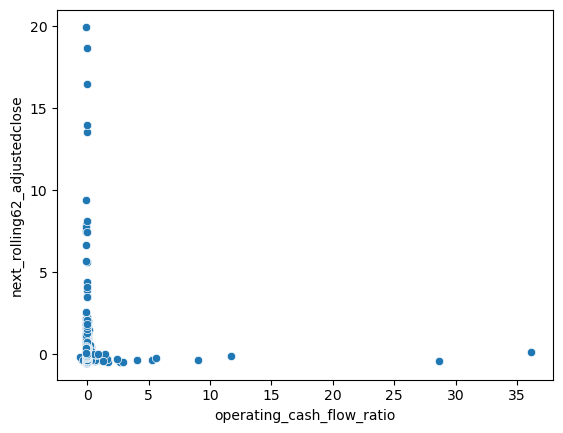

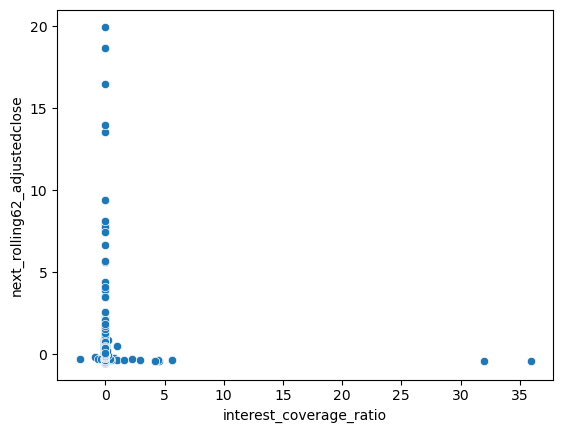

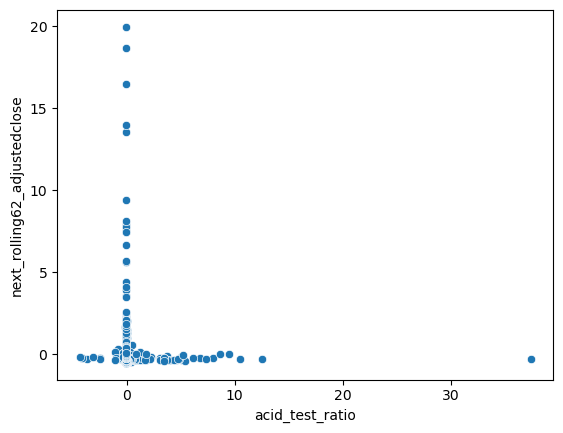

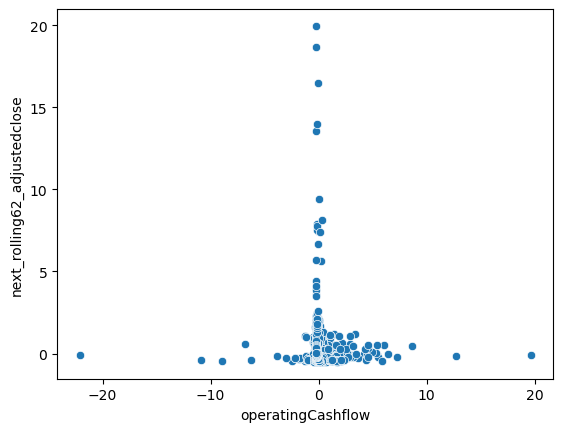

In [173]:
for i in range(len(combinedfilter)):
    #xplot = rdf[combinedfilter[i]]
    plt.figure() 
    sns.scatterplot(data=rdf, x=str(combinedfilter[i]), y='next_rolling62_adjustedclose') #, hue="time")

In [174]:

########################################################################################################
#train a generic Random Forest Regressor (default parameters) model to then look at model decay in future quarters 
#in other words, use the same model on successive quarters without retraining with new data. 
################################################################################################


dfout = prep_for_regressor(df)
X,y=get_X_y_data_regressor(dfout,sequence=sequences[0])
print('shapes')
print(dfout.shape,X.shape,y.shape)

### starting ML ##############
#split into train/test sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=42)
#train a "no frills Random Forest Classifier"
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train,y_train)

top_n_rfr =get_top_n_important_features(X_train,model=rf,n=topfeatures)
print('how the model ranks the same feature subset')
print(top_n_rfr)
#evaluate_model(model=rf, X_test=X_test, Y_test=y_test)

####################################################################################################
#look at decay.. accuracy, precision, recall, F1 scores without training a new model with new data
####################################################################################################
l=[]

for j in range(len(sequences)):
    print('\n\n\nsequence:',j)
    #dfout,X,y = prep_for_classifier(df,sequence=sequences[j])
    X,y=get_X_y_data_regressor(dfout,sequence=sequences[j])
    print('shapes')
    print(dfout.shape,X.shape,y.shape)

    ### starting ML ##############
    #split into train/test sets 
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=42)
    try:
        evaluate_regressor_model(model=rfr, X_test=X_test, y_test=y_test)
        
        
    except Exception as e:
        print(e)


shapes
(2480, 115) (496, 113) (496,)
how the model ranks the same feature subset
                                   Feature         Model Weight
1                  gics_sector_Health Care                 0.05
2                        operatingExpenses                 0.05
3                              investments                 0.04
4                              commonStock                 0.04
5                   gics_sector_Financials                 0.03
6                              totalAssets                 0.03
7                      investmentIncomeNet                 0.03
8                         retainedEarnings                 0.03
9                    otherNonCurrentAssets                 0.03
10  accumulatedDepreciationAmortizationPPE                 0.03
11                   gics_sector_Materials                 0.03
12                               inventory                 0.03
13            gics_sector_Consumer Staples                 0.03
14                    c

In [175]:
#trying regressor models  

########################################################################################################
#train a generic Random Forest Regressor (default parameters) model to then look at model decay in future quarters 
#in other words, use the same model on successive quarters without retraining with new data. 
################################################################################################

dfout = prep_for_regressor(df)
#X,y=get_X_y_data(dfout,sequence=sequences[0])
X,y = get_X_y_data_regressor(dfout,sequence=0)

print('shapes')
print(X.shape,y.shape)

### starting ML ##############
#split into train/test sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=42)
#train a "no frills Random Forest Classifier"
#rf = RandomForestClassifier(random_state=42)
#rf.fit(X_train,y_train)
#gbc =GradientBoostingClassifier(random_state=42)
#gbc.fit(X_train,y_train)
rfreg = RandomForestRegressor(random_state=42)
rfreg.fit(X_train,y_train)

#evaluate_model(model=rf, X_test=X_test, Y_test=y_test)

####################################################################################################
#look at decay.. accuracy, precision, recall, F1 scores without training a new model with new data
####################################################################################################
for j in range(len(sequences)):
    print('\n\n\nsequence:',j)
    #dfout,X,y = prep_for_classifier(df,sequence=sequences[j])
    X,y=get_X_y_data_regressor(dfout,sequence=sequences[j])
    print('shapes')
    print(dfout.shape,X.shape,y.shape)

    ### starting ML ##############
    #split into train/test sets 
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=42)
    y_pred = rfreg.predict(X_test)
    
    #source:https://stackoverflow.com/questions/50789508/random-forest-regression-how-do-i-analyse-its-performance-python-sklearn
    print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
    print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
    print('Accuracy:', round(100*(1 - mape), 2))
    print('Score:',r2_score(y_test, y_pred))
    #     #try:
    #    evaluate_model(model=rfreg, X_test=X_test, Y_test=y_test)
    #except Exception as e:
    #    print(e)


shapes
(496, 113) (496,)



sequence: 0
shapes
(2480, 115) (496, 113) (496,)
Mean Absolute Error (MAE): 0.051150623613757835
Mean Squared Error (MSE): 0.02684204474417064
Root Mean Squared Error (RMSE): 0.1638354196874737
Mean Absolute Percentage Error (MAPE): 21.94
Accuracy: 78.06
Score: 0.9429027635625478



sequence: 1
shapes
(2480, 115) (496, 113) (496,)
Mean Absolute Error (MAE): 0.06600403268089215
Mean Squared Error (MSE): 0.024241889866895162
Root Mean Squared Error (RMSE): 0.15569807277835895
Mean Absolute Percentage Error (MAPE): 28.76
Accuracy: 71.24
Score: 0.9490000380573879



sequence: 2
shapes
(2480, 115) (496, 113) (496,)
Mean Absolute Error (MAE): 0.07790672048285702
Mean Squared Error (MSE): 0.1211673046014844
Root Mean Squared Error (RMSE): 0.34809094300410115
Mean Absolute Percentage Error (MAPE): 24.22
Accuracy: 75.78
Score: 0.8328602664137027



sequence: 3
shapes
(2480, 115) (496, 113) (496,)
Mean Absolute Error (MAE): 0.08341056438176608
Mean Squared Error (MSE)

In [161]:
#trying regressor models  

########################################################################################################
#train a generic Multiple Linear Regression (default parameters) model to then look at model decay in future quarters 
#in other words, use the same model on successive quarters without retraining with new data. 
################################################################################################


dfout = prep_for_regressor(df)
#X,y=get_X_y_data(dfout,sequence=sequences[0])
X,y = get_X_y_data_regressor(dfout,sequence=0)

print('shapes')
print(X.shape,y.shape)

### starting ML ##############
#split into train/test sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=42)
#train a "no frills Random Forest Classifier"
#rf = RandomForestClassifier(random_state=42)
#rf.fit(X_train,y_train)
#gbc =GradientBoostingClassifier(random_state=42)
#gbc.fit(X_train,y_train)
lrreg = LinearRegression()
lrreg.fit(X_train,y_train)

#evaluate_model(model=rf, X_test=X_test, Y_test=y_test)

####################################################################################################
#look at decay.. accuracy, precision, recall, F1 scores without training a new model with new data
####################################################################################################
for j in range(len(sequences)):
    print('\n\n\nsequence:',j)
    #dfout,X,y = prep_for_classifier(df,sequence=sequences[j])
    X,y=get_X_y_data_regressor(dfout,sequence=sequences[j])
    print('shapes')
    print(dfout.shape,X.shape,y.shape)

    ### starting ML ##############
    #split into train/test sets 
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=42)
    y_pred = lrreg.predict(X_test)
    
    #source:https://stackoverflow.com/questions/50789508/random-forest-regression-how-do-i-analyse-its-performance-python-sklearn
    print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
    print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
    print('Accuracy:', round(100*(1 - mape), 2))
    print('Score:',r2_score(y_test, y_pred))
    #     #try:
    #    evaluate_model(model=rfreg, X_test=X_test, Y_test=y_test)
    #except Exception as e:
    #    print(e)


shapes
(496, 113) (496,)



sequence: 0
shapes
(2480, 115) (496, 113) (496,)
Mean Absolute Error (MAE): 0.06117268250985035
Mean Squared Error (MSE): 0.01622023335729561
Root Mean Squared Error (RMSE): 0.12735867994485342
Mean Absolute Percentage Error (MAPE): 42.6
Accuracy: 57.4
Score: 0.9654970212627603



sequence: 1
shapes
(2480, 115) (496, 113) (496,)
Mean Absolute Error (MAE): 0.07534905930093197
Mean Squared Error (MSE): 0.014739012085810865
Root Mean Squared Error (RMSE): 0.12140433306027781
Mean Absolute Percentage Error (MAPE): 61.18
Accuracy: 38.82
Score: 0.9689921429568672



sequence: 2
shapes
(2480, 115) (496, 113) (496,)
Mean Absolute Error (MAE): 0.10138028834646926
Mean Squared Error (MSE): 0.051630764019892667
Root Mean Squared Error (RMSE): 0.2272240392649789
Mean Absolute Percentage Error (MAPE): 44.94
Accuracy: 55.06
Score: 0.9287798620962628



sequence: 3
shapes
(2480, 115) (496, 113) (496,)
Mean Absolute Error (MAE): 0.07199297564365678
Mean Squared Error (MSE):

In [162]:
# sequence: 3
# shapes
# (1984, 115) (496, 113) (496,)
# Mean Absolute Error (MAE): 0.0759207791400863
# Mean Squared Error (MSE): 0.10396274066219453
# Root Mean Squared Error (RMSE): 0.3224325366060233
# Mean Absolute Percentage Error (MAPE): 19.83
# Accuracy: 80.17
# Score: 0.8867528037666317